In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
perfil200=pd.read_csv("profile-200.xvg", skiprows=(16), delimiter="\t",names=["x","y"])

Verifica as primeiras linhas, se importou direito

In [8]:
print (perfil200.head())

          x         y
0 -9.047791  0.000000
1 -9.006979  1.193002
2 -8.966168  1.682323
3 -8.925357  1.917134
4 -8.884545  2.023831


Inverte o sinal de x

In [9]:
perfil200["x"]=perfil200["x"]*-1

Imprime o máximo e o mínimo da curva

In [77]:
#perfil200.min()
y_min=perfil200["y"].min()
y_max=perfil200["y"].max()
delta=y_max - y_min
print('min:',y_min, 'max:',y_max,'delta:',delta)

min: -46.03204 max: 2.023831 delta: 48.055871


gera o gráfico

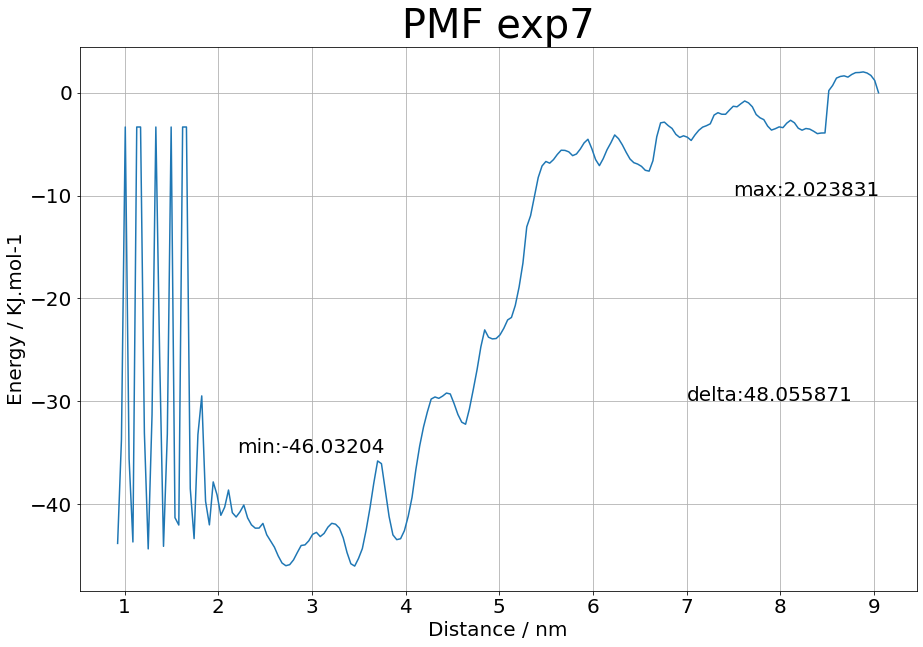

In [87]:
p = perfil200.plot.line(x="x",y="y", grid=True, legend=False,figsize=(15,10))
p.set_title("PMF exp7", size=40)
p.set_xlabel("Distance / nm", size=20)
p.set_ylabel("Energy / KJ.mol-1", size=20)
p.text(2.2,-35,'min:'+str(y_min), size=20)
p.text(7.5,-10,'max:'+str(y_max),size=20)
p.text(7,-30,'delta:'+str(delta),size=20)
p.tick_params(labelsize=20)
plt.show()

Salva o plot em arquivo

In [88]:
p.get_figure().savefig("pmfEXP7.20200901.png")